# Convolução em duas dimensões

Para processar imagens, precisamos de um kernel bidimensional (matriz) que se movimente nas duas dimensões.

Por exemplo:

- **Imagem**: Intensidade da cor do pixel, quanto menor o valor, mais próximo do preto. Dessa forma, temos uma borda escura entre os pixels de intensidade 80 e 20:
              1     2     3     4    5    6
           |---------------------------------|
         1 |  90 |  85 |  80 |  20 | 15 | 10 |
           |---------------------------------|
         2 |  90 |  85 |  80 |  20 | 15 | 10 |
           |---------------------------------|
         3 |  90 |  85 |  80 |  20 | 15 | 10 |
           |---------------------------------|
         4 |  90 |  85 |  80 |  20 | 15 | 10 |
           |---------------------------------|
         5 |  90 |  85 |  80 |  20 | 15 | 10 |
           |---------------------------------|

- **Kernel (filtro)**: Queremos um filtro que busque a borda escura:

              1    2   3
           |--------------|
         1 |  1 |  0 | -1 |
           |--------------|
         2 |  1 |  0 | -1 |
           |--------------|
         3 |  1 |  0 | -1 |
           |--------------|

A pergunta na qual o filtro quer responder é a seguinte:

- O quão provável é que a vizinhança do pixel Lx Cy contenha uma borda vertical que vai do claro para o escuro?

As iterações são feitas pixel a pixel, o filtro deve se sobrepor totalmente sobre a imagem. Dessa forma, os pixels das bordas não poderão ser convolucionados. O pixel central (L2 C2) do filtro se alinha ao pixel da posição L2 C2 da imagem para calcular o valor da convolução do pixel L2 C2 do mapa de características. A primeira iteração será:
        
        1x90 + 0x85 + (-1x80) = 10
        1x90 + 0x85 + (-1x80) = 10
        1x90 + 0x85 + (-1x80) = 10
        10 + 10 + 10 = 30

O mesmo processo é repetido posicionando o kernel em todos os pontos da imagem. O mapa de características: Mapa após as iterações do kernel com a imagem:

             2      3     4     5    
           |-----------------------|
         2 |  30 | 195 | 195 |  30 |
           |-----------------------|
         3 |  30 | 195 | 195 |  30 |
           |-----------------------|
         4 |  30 | 195 | 195 |  30 | 
           |-----------------------|
         5 |  30 | 195 | 195 |  30 | 
           |-----------------------|


- Os pesos do Kernel carregam o padrão visual que deve ser procurado na imagem;
- O treinamento de Redes Convolucionais otimiza os pesos de múltiplos Kernels.

In [1]:
from skimage import io, color, transform, data
from scipy.signal import convolve
import matplotlib.pyplot as plt
import numpy as np

## Buscando padrões

Vamos assumir que buscamos detectar bordas em imagens. Usaremos como exemplo uma parede de tijolos:

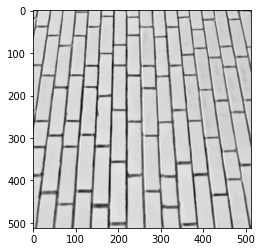

In [2]:
img = data.brick()
plt.imshow(img, cmap='Greys')

Função para imprimir os kernels como imagens:

In [3]:
def show_kernel(valores, titulo):
    plt.figure(figsize=(len(valores), len(valores)))
    plt.imshow(valores, cmap='gray')
    for i, line in enumerate(valores):
        for j, col in enumerate(line):
            plt.text(j, i, '{:.0f}'.format(col), fontsize=16, color='red', ha='center', va='center')
    plt.title(titulo)
    plt.xticks([])
    plt.yticks([])

### Definição de Kernels

Vamos definir dois kernels:
- Filtro de bordas verticais;
- Filtro de bordas horizontais.

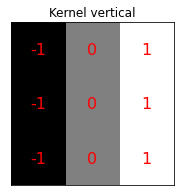

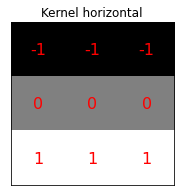

In [6]:
kernel_vertical = [ [-1, 0, 1],
                    [-1, 0, 1],
                    [-1, 0, 1]]

kernel_horizontal = [ [-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]]

show_kernel(kernel_vertical, 'Kernel vertical')
show_kernel(kernel_horizontal, 'Kernel horizontal')

Como os kernels são invertidos na convolução, nossos filtros irão buscar bordas que vão do claro para o escuro.

Vamos agora convoluir ambos os kernels com a parede de tijolos. Cada Kernel destacará partes diferentes da imagem. O resultado da convolução entre os dados e o kernel é chamado de **Mapa de Características** ou **Mapa de Ativação**.

Text(0.5, 1.0, 'Convolução com Kernel vertical')

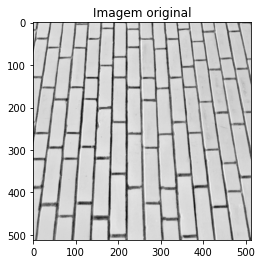

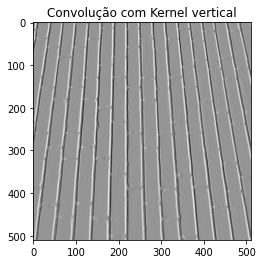

In [10]:
mapa_caracteristicas = convolve(img, kernel_vertical, mode='valid') # mode='valid' irá operar apenas com pixels válidos, excluindo as bordas

plt.imshow(img, cmap='Greys')
plt.title('Imagem original')

plt.figure()
plt.imshow(mapa_caracteristicas, cmap='Greys')
plt.title('Convolução com Kernel vertical')

Text(0.5, 1.0, 'Convolução com Kernel horizontal')

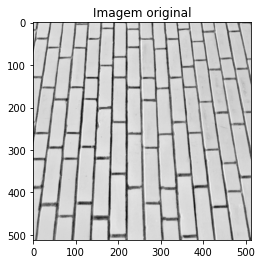

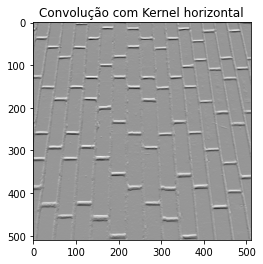

In [12]:
mapa_caracteristicas = convolve(img, kernel_horizontal, mode='valid') # mode='valid' irá operar apenas com pixels válidos, excluindo as bordas

plt.imshow(img, cmap='Greys')
plt.title('Imagem original')

plt.figure()
plt.imshow(mapa_caracteristicas, cmap='Greys')
plt.title('Convolução com Kernel horizontal')

Os kernels buscam bordas do claro para escuro, porém encontram também o oposto, mas em extremos contrários da ativação:

- Claro para escuro: 1
- Escuro para claro: -1

Podemos dessa forma pegar o valor absoluto do resultado, já que estamos procurando simplesmente bordas, e não as sequências de cores. Para isso, utilizamos np.abs() para plotar o mapa de características:

Text(0.5, 1.0, 'Convolução com Kernel vertical')

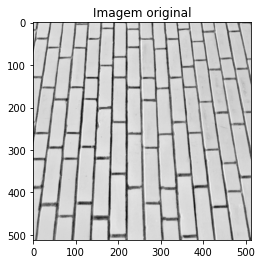

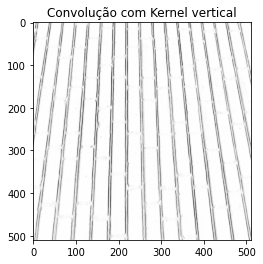

In [14]:
mapa_caracteristicas = convolve(img, kernel_vertical, mode='valid') # mode='valid' irá operar apenas com pixels válidos, excluindo as bordas

plt.imshow(img, cmap='Greys')
plt.title('Imagem original')

plt.figure()
plt.imshow(np.abs(mapa_caracteristicas), cmap='Greys')
plt.title('Convolução com Kernel vertical')